In [7]:
import pandas as pd
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from yellowbrick.cluster import InterclusterDistance
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn import metrics
import pickle
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.cluster import KMeans

In [8]:
raw_data_1 = pd.read_csv("./Preprocessing.csv")

raw_data_1.head(100)

,Nama Paket,Instansi,preprocessing
0,Tenaga Ahli Data Driven Kegiatan Koordinasi Se...,Kementerian Perencanaan Pembangunan Nasional,tenaga ahli data driven kegiatan koordinasi se...
1,Tenaga Ahli IT Analisa Sistem Kegiatan Koord...,Kementerian Perencanaan Pembangunan Nasional,tenaga ahli it analisa sistem kegiatan koordin...
2,Tenaga Ahli Senior Monitoring dan Evaluasi Str...,Kementerian Perencanaan Pembangunan Nasional,tenaga ahli senior monitoring evaluasi strateg...
3,Tenaga Ahli Senior Perencanaan Strategic Natio...,Kementerian Perencanaan Pembangunan Nasional,tenaga ahli senior perencanaan strategic natio...
4,Tenaga Ahli Muda Bidang Energy Policy Kegiatan...,Kementerian Perencanaan Pembangunan Nasional,tenaga ahli muda bidang energy policy kegiatan...
...,...,...,...
95,Pengadaan Generator Set 100 Kva / 80 Kw spse 4...,PDAM Tirta Moedal,pengadaan generator set 100 kva 80 kw spse 4.3...
96,Pengadaan Gate Valve Tahun 2019 Tender Ulang s...,PDAM Tirta Aji Kabupaten Wonosobo,pengadaan gate valve tahun 2019 tender ulang s...
97,Management Pressur Jaringan Distribusi Tender ...,PDAM Tirta Aji Kabupaten Wonosobo,management pressur jaringan distribusi tender ...
98,Pengadaan Pemancar FM 1 KW + Antena + Coaxcial...,Lembaga Penyiaran Radio Republik Indonesia,pengadaan pemancar fm 1 kw antena coaxcial ins...


In [9]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_weights_matrix = tfidf_vectorizer.fit_transform(raw_data_1['preprocessing'])
lda = LDA(n_components=20,n_jobs=-1)
lda_output = lda.fit_transform(tfidf_weights_matrix)
scaler = StandardScaler()
vectorScaler = scaler.fit_transform(lda_output)
vectorNormalize = normalize(vectorScaler)
pickle.dump(vectorNormalize,open("vectorNormalize.pickle","wb"))

In [10]:
kmeans_obj = KMeans(n_clusters=25, random_state=50)
kmeans_obj.fit(vectorNormalize)
pickle.dump(kmeans_obj,open("kmeans.pickle","wb"))

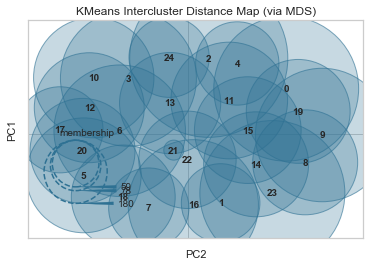

In [11]:
visualizer_kmeans = InterclusterDistance(kmeans_obj, random_state = 50)
visualizer_kmeans.fit(vectorNormalize)
visualizer_kmeans.finalize()

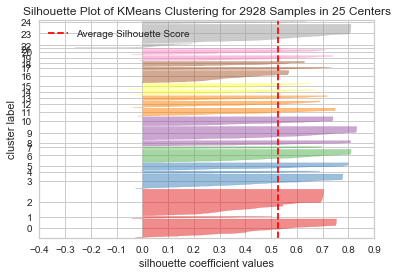

In [12]:
visualizer_kmeans_silhouette = SilhouetteVisualizer(kmeans_obj, color='yellowbrick')
visualizer_kmeans_silhouette.fit(vectorNormalize)
visualizer_kmeans_silhouette.show()

In [13]:
labels = kmeans_obj.labels_
silhouette_score = metrics.silhouette_score(vectorNormalize, labels, metric='euclidean')
silhouette_score

0.5269488524483711